# Respondent-driven sampling 

Hidden or hard-to-reach populations occur when sampling procedures are nonexistent and public knowledge about about the members is imprecise because of social stigma and criminalization. It is hard to estimate probabilities in this cenario by common demographic census given that the target population produces low response rates. Sex workers, homeless people, men who have sex with men and drug users are examples. Respondet-driven sampling is a procedure with a dual system of structured incentives in a chain-referral way. Starting with some individuals (seeds) of the target population, each actor recruits other in their network through coupons. Other methods include snowball sampling, key important sampling and target sampling. 

In this notebook, we explore the features of this procedure through a dataset of activist refugees from Syria. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx
import seaborn as sns
sns.set()

## Data

Here we present the data and explain each title 

`id`: sequential case number. 

`recruit.id`: number that identifies each individual and it is used to link each participants to one another. The seeds have 1 digit and each new wave have a digit more. The individual 1 receives the coupons: 11, 12 and 13, the individual 22 receives 221, 222, 223, and so. 

`coupon.1, .2, .3`: the coupon received by the individual. 

`degree`: network's degree informed. 

The other columns are answers to demographic and activism questions developed by the research.

In [7]:
data = pd.read_excel("../data/Harvard_refugees_activists/rds_replication_data.xlsx", 
                     dtype = {"id": str,
                              "recruit.id": str, 
                              "coupon.1": str, 
                              "coupon.2": str, 
                              "coupon.3": str})
data.head()

,id,recruit.id,coupon.1,coupon.2,coupon.3,degree,sex,age,education,humanitarian,...,parties,most_recent,employ_status,time_status,formality,cooperation,cooperation_location,syria_pre2011,syria_post2011,trust
0,1,1,11,12,13,30,2,28,6,1,...,3.0,4,1,1,2,1,1.0,1,2,2
1,2,2,21,22,23,6,1,30,7,1,...,3.0,1,1,2,2,1,3.0,2,2,2
2,3,4,41,42,43,25,1,28,4,2,...,3.0,4,2,1,2,1,3.0,2,1,1
3,4,12,121,122,123,3,1,33,6,1,...,2.0,8,2,2,2,1,1.0,2,1,1
4,5,5,51,52,53,30,1,31,6,1,...,3.0,4,2,1,2,1,3.0,1,1,2


Renaming some columns.

In [8]:
data.rename(columns = {"recruit.id": "recruit_id", 
                       "coupon.1": "coupon_1", 
                       "coupon.2": "coupon_2", 
                       "coupon.3": "coupon_3"}, 
                  inplace=True)

Some strings in coupons columns have a space after the number. 

In [9]:
data.recruit_id = data.recruit_id.apply(lambda x: x.strip())
data.coupon_1 = data.coupon_1.apply(lambda x: x.strip())
data.coupon_2 = data.coupon_2.apply(lambda x: x.strip())
data.coupon_3 = data.coupon_3.apply(lambda x: x.strip())

Given that the dataset has big integers, I will change its enumeration rule. Each recruiter will be enumerated acording to its sequencial appearence.

In [10]:
# rename recruiter with sequencial appearance
rename_dict = dict(zip(data.recruit_id, data.id))
# obtain the wave of the recruiter
wave_dict = dict(zip(data.recruit_id, data.recruit_id.apply(lambda x: len(str(x)))))

In [11]:
data.coupon_1 = data.coupon_1.map(rename_dict)
data.coupon_2 = data.coupon_2.map(rename_dict)
data.coupon_3 = data.coupon_3.map(rename_dict)
data.recruit_id = data.recruit_id.map(wave_dict)
data.rename(columns = {"recruit_id": "wave"}, inplace = True)

## Network 

Here we see the network and the demographic variables associated with each node. 

In [12]:
nodes = [(s[1][0], {"wave": s[1][1], 
                    "degree": s[1][5], 
                    "sex": s[1][6], 
                    "age": s[1][7],
                    "education": s[1][8]}) for s in data.iterrows()]

edges = [(s[1][0], s[1][2]) for s in data.iterrows() if pd.notna(s[1][2])]
edges.extend([(s[1][0], s[1][3]) for s in data.iterrows() if pd.notna(s[1][3])])
edges.extend([(s[1][0], s[1][4]) for s in data.iterrows() if pd.notna(s[1][4])])

In [13]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [25]:
g = 'sex'
groups = set(nx.get_node_attributes(G,g).values())
mapping = dict(zip(sorted(groups),range(len(groups))))
nodes = G.nodes()
colors = [mapping[G.nodes[n][g]] for n in nodes]
colors = ['cyan' if i==1 else 'red' for i in colors]

No handles with labels found to put in legend.


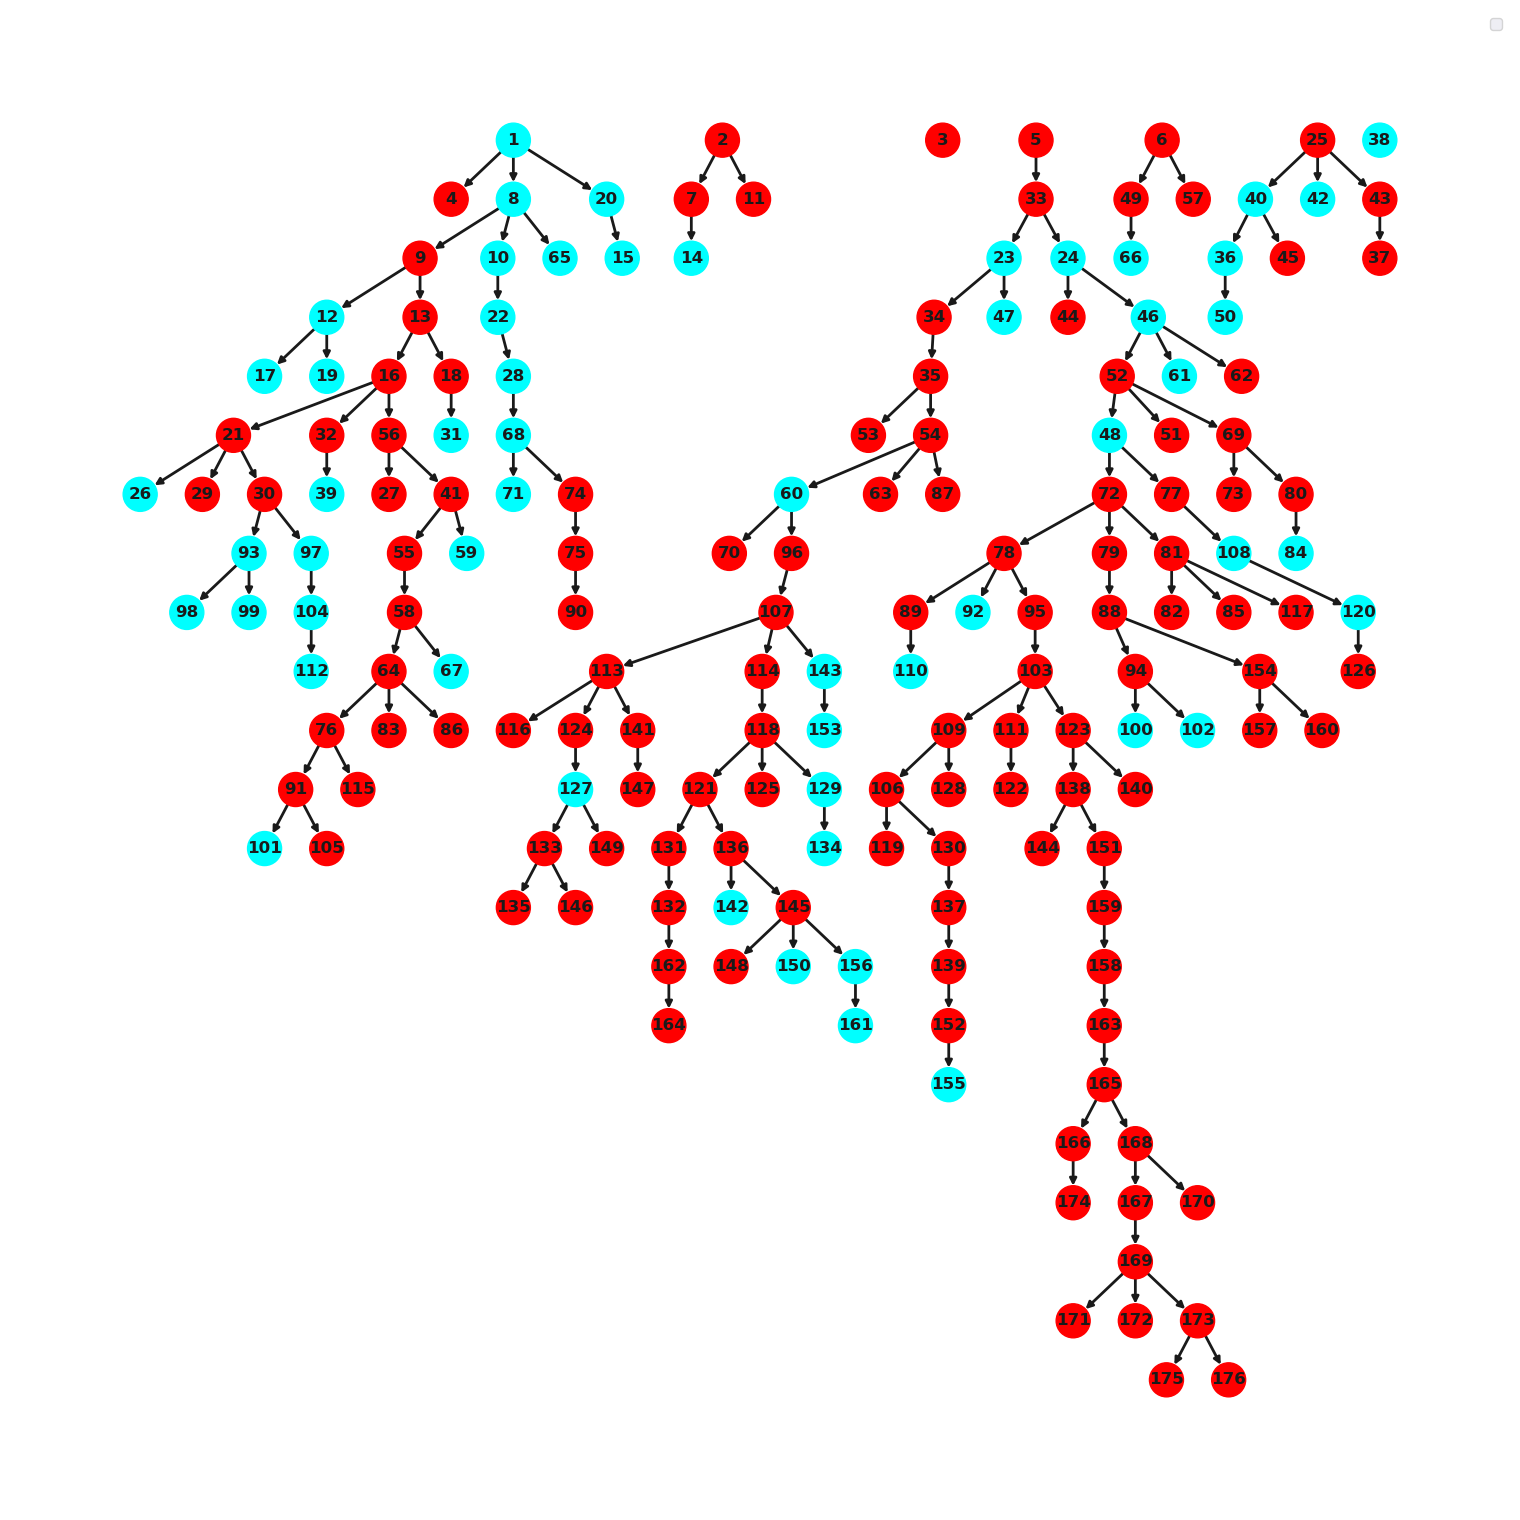

In [27]:
options = {
    'node_color': colors,
    'node_size': 600,
    'width': 2,
    'with_labels': True,
    'font_weight': 'bold'
}

plt.figure(figsize = (15,15))
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, **options)
plt.legend()
plt.savefig("../images/graph-rds-harvard.png", bbox_inches = 'tight')
plt.show()

Mean of recruited per recruiter. 

In [28]:
sum(dict(G.out_degree()).values())/len(dict(G.out_degree()).values())

0.9602272727272727

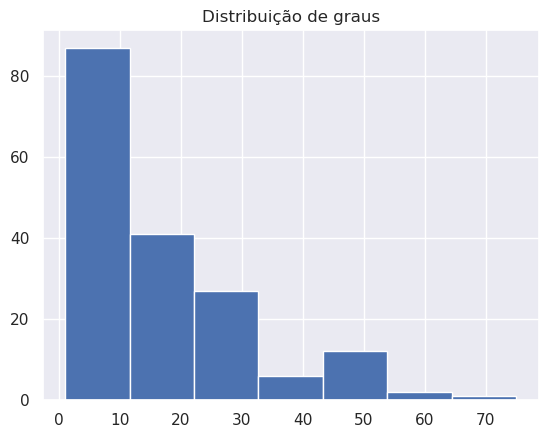

In [33]:
data.degree.hist(bins=7)
plt.title("Distribuição de graus")
plt.show()

# Referências 

[1] Khoury, Rana B., 2020, "Replication Data for: Hard-to-Survey Populations and Respondent-Driven Sampling: Expanding the Political Science Toolbox", https://doi.org/10.7910/DVN/XKOVUN, Harvard Dataverse, V1, UNF:6:aCejo0iCW+kK0AZVtMP2FA== [fileUNF]